In [1]:
%load_ext autoreload
%autoreload 2

from core import GeoCanvas
import matplotlib.pyplot as plt
import geopandas as gpd
data = r"C:\Users\Nick\Documents\code\geocanvas\exampes\data\fulton_county_cities.geojson"
cities = gpd.read_file(data)

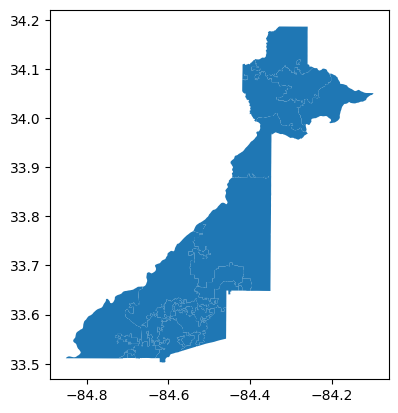

In [2]:
ax = cities.plot()

In [29]:
cities.columns

Index(['OBJECTID', 'Name', 'TaxCode', 'AreaAc', 'AreaSqMi', 'GEOID10',
       'FeatureID', 'MuniCode', 'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

<class 'matplotlib.collections.PatchCollection'> _child0
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.axis.XAxis'> Text(0.5, 0, '')
<class 'matplotlib.axis.YAxis'> Text(0, 0.5, '')
<class 'matplotlib.text.Text'> 
<class 'matplotlib.text.Text'> 
<class 'matplotlib.text.Text'> 
<class 'matplotlib.patches.Rectangle'> 


AttributeError: 'GeoDataFrame' object has no attribute 'get_xlim'

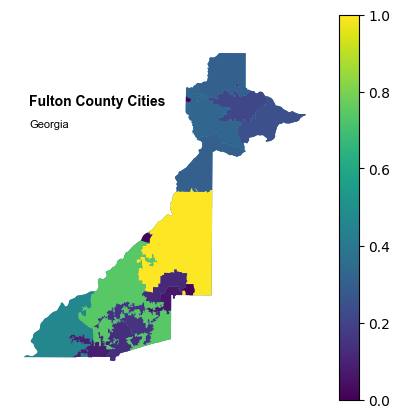

In [32]:
from components import *

canvas = cities.geocanvas(figsize=(5, 5)) \
    + Title(title="Fulton County Cities", subtitle="Georgia") \
    + Choropleth(column="AreaSqMi") \
    + Colorbar()
canvas.plot()

In [ ]:
canvas = cities.geocanvas(figsize=(5, 5)) \
    + Choropleth(column="AreaSqMi", cmap="viridis") \
    + Colorbar()
canvas.plot()

-84.88884129206718 -84.05996472978683 33.46832474249574 34.220395881241366
0.8288765622803567 0.7520711387456274
-84.474403010927 33.844360311868556


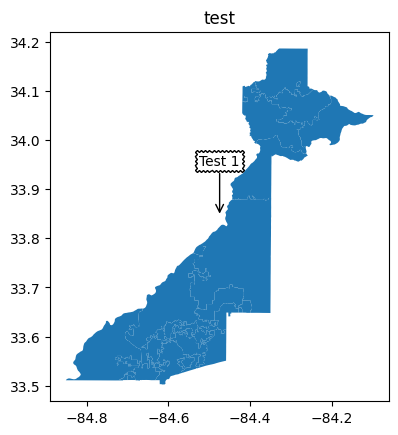

In [2]:
from matplotlib.offsetbox import AnnotationBbox, TextArea


ax = cities.plot()
ax.set_title("test")
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
print(xmin, xmax, ymin, ymax)
print(xmax - xmin, ymax - ymin)
x = xmin + (xmax - xmin) / 2
y = ymin + (ymax - ymin) / 2
print(x, y)
offsetbox = TextArea("Test 1")

ab = AnnotationBbox(offsetbox, xy=(x, y),
                    xybox=(0, 40),
                    xycoords='data',
                    boxcoords="offset points",
                    arrowprops=dict(arrowstyle="->"),
                    bboxprops=dict(boxstyle="sawtooth"))
ax.add_artist(ab)

In [3]:
# we know how to use annotationbbox for any of our annotation needs
# (title, subtitle, arrows, labels)
#
# we do need to figure out if we can use it for a custom legend

# we still need to figure out finding empty area correctly

In [4]:
for artist in ax.get_children():
    print(type(artist), artist.get_label())

<class 'matplotlib.collections.PatchCollection'> _child0
<class 'matplotlib.offsetbox.AnnotationBbox'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.axis.XAxis'> Text(0.5, 4.444444444444445, '')
<class 'matplotlib.axis.YAxis'> Text(4.444444444444466, 0.5, '')
<class 'matplotlib.text.Text'> 
<class 'matplotlib.text.Text'> 
<class 'matplotlib.text.Text'> 
<class 'matplotlib.patches.Rectangle'> 


POLYGON ((-84.7058461805276 33.5114696554739, -84.7110950925408 33.5114214143474, -84.7110933623141 33.5110927236739, -84.7110927696859 33.510971799651, -84.7110917716244 33.5107601840116, -84.7132094983508 33.5107519583894, -84.7162852050145 33.5107401371994, -84.7165066554135 33.5107392924774, -84.7210086662716 33.5107218394828, -84.7296132432302 33.5106879852352, -84.7390492853035 33.5107215616086, -84.7460177562671 33.5107457842092, -84.7493747749771 33.5107573853107, -84.7624222586205 33.5108014114983, -84.778826746373 33.510854866206, -84.7952312199116 33.5109061474163, -84.8444445290937 33.5110469572893, -84.8509716772921 33.5110642534758, -84.8511621323097 33.5110647133731, -84.8511650846908 33.5110646970599, -84.8505736922166 33.511874586379, -84.8496069708784 33.5126862675992, -84.8491340358836 33.5130835276428, -84.8475118921536 33.5138702197576, -84.8469050242917 33.5140928672759, -84.845774703253 33.514507465049, -84.8444735226819 33.5147652353835, -84.8439325803105 33.514

<Axes: >

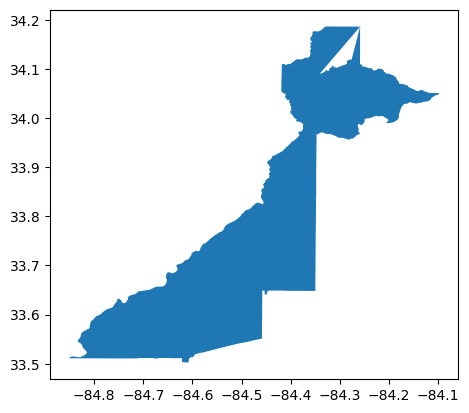

In [5]:
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import unary_union
from shapely.validation import make_valid
geometries = []
for artist in ax.get_children():
    if isinstance(artist, PatchCollection):
        for patch in artist.get_paths():
            vertices = patch.vertices
            geometry = Polygon(vertices)
            geometries.append(geometry)
    if isinstance(artist, AnnotationBbox):
        # Get the bounding box coordinates of the AnnotationBbox
        bbox = artist.get_window_extent(ax.figure.canvas.get_renderer())
        bbox_coords = ax.transData.inverted().transform(bbox)
        
        # Create a Polygon geometry from the bounding box coordinates
        x0, y0 = bbox_coords[0]
        x1, y1 = bbox_coords[1]
        annotation_geometry = Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)])
        
        #geometries.append(annotation_geometry)


# Union all the geometries together
valid_geometries = [make_valid(geom) for geom in geometries]
union_polygon = unary_union(valid_geometries)

# Print the resulting multi-polygon
print(union_polygon)
p = gpd.GeoSeries(union_polygon)
p.plot()

# so we've established we can extract geometries, lets not just only do PathCollections tho
# keep track of adding new geometries so we don't need to recalc

# we can get the annotationbbox geometry, but the arrow has a full box which isn't ideal
# we might not even want to count the annotationbboxes for labels


In [10]:
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

In [11]:
from shapely.geometry import Polygon, MultiPolygon, box
axes_area = box(xmin, ymin, xmax, ymax)

<Axes: >

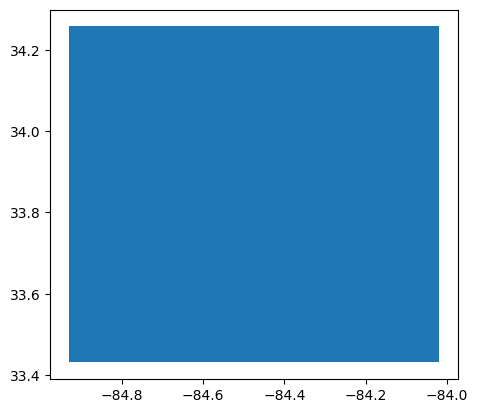

In [12]:
p = gpd.GeoSeries(axes_area)
p.plot()

In [13]:
diff = axes_area.difference(union_polygon)
diff = gpd.GeoSeries(diff)
diff.plot()

NameError: name 'union_polygon' is not defined

[(0.0076524616914695216, -84.83703650692466, 33.51532918866734, 0, 0), (0.00890676147884936, -84.83703650692466, 33.60933808101055, 0, 1), (0.009740220938652417, -84.83703650692466, 33.70334697335374, 0, 2), (0.009740220938652417, -84.83703650692466, 33.79735586569695, 0, 3), (0.00974022093865168, -84.83703650692466, 33.891364758040154, 0, 4), (0.009740220938652417, -84.83703650692466, 33.98537365038335, 0, 5), (0.009740220938652417, -84.83703650692466, 34.079382542726556, 0, 6), (0.009740220938652417, -84.83703650692466, 34.17339143506976, 0, 7), (0.004420094701906392, -84.73342693663962, 33.51532918866734, 1, 0), (0.0025430762320729663, -84.73342693663962, 33.60933808101055, 1, 1), (0.009740220938652417, -84.73342693663962, 33.70334697335374, 1, 2), (0.009740220938652417, -84.73342693663962, 33.79735586569695, 1, 3), (0.00974022093865168, -84.73342693663962, 33.891364758040154, 1, 4), (0.009740220938652417, -84.73342693663962, 33.98537365038335, 1, 5), (0.009740220938652417, -84.7334

ValueError: too many values to unpack (expected 5)

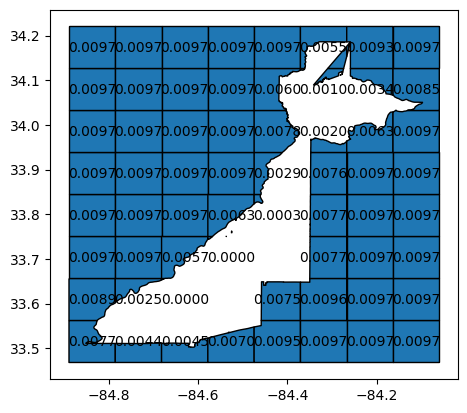

In [57]:
# create a grid overlay
import numpy as np
from scipy import ndimage
from shapely.geometry import shape, box

empty_area = diff
n = 8
x_range = np.linspace(xmin, xmax, n + 1)
y_range = np.linspace(ymin, ymax, n + 1)

# find intersection area for each grid cell and the empty area plot
intersection_areas = []
area_totals = []
for i in range(n):
    for j in range(n):
        grid_box = box(x_range[i], y_range[j], x_range[i + 1], y_range[j + 1])
        intersection_area = empty_area.intersection(grid_box)
        if intersection_area.geom_type.iloc[0] == 'GeometryCollection':
            for geom in intersection_area.geoms.iloc[0]:
                if not geom.is_empty:
                    intersection_areas.append(geom)
                    area_totals.append((geom.area, grid_box.centroid.x, grid_box.centroid.y, i, j))
        elif not intersection_area.is_empty.iloc[0]:
            intersection_areas.append(intersection_area.iloc[0])
            area_totals.append((intersection_area.area.iloc[0], grid_box.centroid.x, grid_box.centroid.y, i, j))

ax = gpd.GeoDataFrame(geometry=intersection_areas).plot(edgecolor="black")
for area, x, y, _, _ in area_totals:
    ax.text(x, y, f"{area:.4f}", ha="center", va="center")

print(area_totals)

# Initialize a 2D array with zeros
areas_2d = np.zeros((n, n))

# Fill in the area values based on grid cell indices
for area, _, _, i, j in area_totals:
    areas_2d[i, j] = area

# Define the convolution filter
convolution_filter = np.array([[1, 1, 1], [1, 7, 1], [1, 1, 1]])

# Perform the convolution
filtered_areas = ndimage.convolve(areas_2d, convolution_filter, mode='constant', cval=0.0)

# Print the filtered areas
print(filtered_areas)
for area, x, y, _, _ in filtered_areas:
    ax.text(x, y, f"{area:.4f}", ha="center", va="center")

# Use the polygon in your code
# ...

<class 'matplotlib.collections.PatchCollection'> _child0
<class 'matplotlib.offsetbox.AnnotationBbox'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.spines.Spine'> 
<class 'matplotlib.axis.XAxis'> Text(0.5, 23.52222222222222, '')
<class 'matplotlib.axis.YAxis'> Text(112.8111124618918, 0.5, '')
<class 'matplotlib.text.Text'> 
<class 'matplotlib.text.Text'> 
<class 'matplotlib.text.Text'> 
<class 'matplotlib.patches.Rectangle'> 


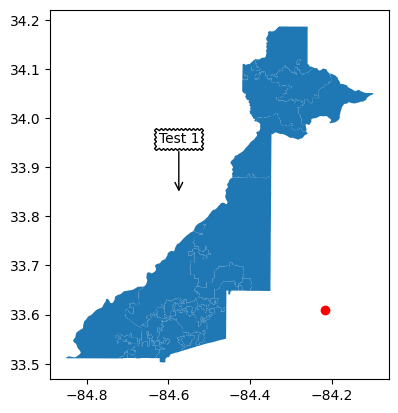

In [33]:
from matplotlib.offsetbox import AnnotationBbox, TextArea
import numpy as np
from shapely.geometry import Polygon, box
import scipy.ndimage as ndimage
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from shapely.ops import unary_union
from shapely.validation import make_valid


def _collect_valid_geom(ax: plt.Axes):
    geometries = []
    for artist in ax.get_children():
        print(type(artist), artist.get_label())
        if isinstance(artist, PatchCollection):
            for patch in artist.get_paths():
                vertices = patch.vertices
                geometry = Polygon(vertices)
                geometries.append(geometry)
        if isinstance(artist, AnnotationBbox):
            # TODO: simplify
            bbox = artist.get_window_extent(ax.figure.canvas.get_renderer())
            bbox_coords = ax.transData.inverted().transform(bbox)

            x0, y0 = bbox_coords[0]
            x1, y1 = bbox_coords[1]
            annotation_geometry = Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)])
            geometries.append(annotation_geometry)

    return [make_valid(geom) for geom in geometries]


def _get_grid_boxes(x_range: np.ndarray, y_range: np.ndarray, n: int):
    grid_boxes = []
    for i in range(n):
        for j in range(n):
            grid_box = box(x_range[i], y_range[j], x_range[i + 1], y_range[j + 1])
            grid_boxes.append(grid_box)
    return grid_boxes


def _calculate_empty_space_grid(empty_area: Polygon, grid_boxes: list):
    empty_area_within_box = []

    for grid_box in grid_boxes:
        empty_area_box = empty_area.intersection(grid_box)
        if empty_area_box.is_empty:
            empty_area_within_box.append(0.0)
        else:
            empty_area_within_box.append(empty_area_box.area)

    return empty_area_within_box


def find_largest_empty_area(ax: plt.Axes, n: int = 8):
    """_summary_

    Args:
        ax (plt.Axes): _description_
        n (int, optional): _description_. Defaults to 8.
    """
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    axes_area = box(xmin, ymin, xmax, ymax)

    geometries = _collect_valid_geom(ax)
    occupied_space = unary_union(geometries)
    empty_area = axes_area.difference(occupied_space)

    x_range = np.linspace(xmin, xmax, n + 1)
    y_range = np.linspace(ymin, ymax, n + 1)
    grid_boxes = _get_grid_boxes(x_range, y_range, n)
    empty_space_grid = _calculate_empty_space_grid(empty_area, grid_boxes)
    convolution_filter = np.array([[1, 1, 1], [1, 7, 1], [1, 1, 1]])
    empty_space_grid = np.array(empty_space_grid).reshape((n, n))

    convovled_empty_space_grid = ndimage.convolve(
        empty_space_grid, convolution_filter, mode="constant", cval=0.0
    )
    max_empty_space = grid_boxes[np.argmax(convovled_empty_space_grid)]

    return max_empty_space.centroid.x, max_empty_space.centroid.y

ax = cities.plot()
offsetbox = TextArea("Test 1")

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
x = xmin + (xmax - xmin) / 2
y = ymin + (ymax - ymin) / 2

ab = AnnotationBbox(offsetbox, xy=(x-.1, y),
                    xybox=(0, 40),
                    xycoords='data',
                    boxcoords="offset points",
                    arrowprops=dict(arrowstyle="->"),
                    bboxprops=dict(boxstyle="sawtooth"))
ax.add_artist(ab)
x,y = find_largest_empty_area(ax, 8)
plt.plot(x, y, 'o', zorder=10, clip_on=False, color="red")

In [31]:
x, y

(-84.73342693663962, 34.079382542726556)

In [32]:
empty_space_grid.flatten()

array([7.65246169e-03, 8.90676148e-03, 9.74022094e-03, 9.74022094e-03,
       9.74022094e-03, 9.74022094e-03, 9.74022094e-03, 9.74022094e-03,
       4.42009470e-03, 2.54307623e-03, 9.74022094e-03, 9.74022094e-03,
       9.74022094e-03, 9.74022094e-03, 9.74022094e-03, 9.74022094e-03,
       4.53239230e-03, 1.12324452e-05, 5.73958605e-03, 9.74022094e-03,
       9.74022094e-03, 9.74022094e-03, 9.74022094e-03, 9.74022094e-03,
       7.00002514e-03, 0.00000000e+00, 4.12517214e-05, 6.32776258e-03,
       9.74022094e-03, 9.74022094e-03, 9.74022094e-03, 9.74022094e-03,
       9.53527864e-03, 7.49099611e-03, 0.00000000e+00, 2.92326743e-04,
       2.87294037e-03, 7.80429725e-03, 5.99357136e-03, 9.74022094e-03,
       9.74022094e-03, 9.56773275e-03, 7.74290639e-03, 7.66897364e-03,
       7.60171731e-03, 1.99495094e-03, 9.54841297e-04, 5.46521999e-03,
       9.74022094e-03, 9.74022094e-03, 9.74022094e-03, 9.74022094e-03,
       9.74022094e-03, 6.33276969e-03, 3.37977176e-03, 9.34208494e-03,
      

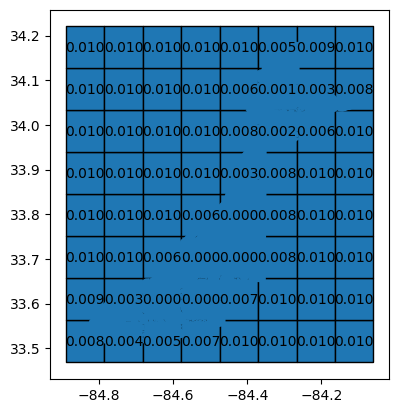

In [26]:
ax = gpd.GeoSeries(grid_boxes).plot(edgecolor="black")
cities.plot(ax=ax)
convolved_empty_space_grid = convolved_empty_space_grid.flatten()
empty_space_grid = empty_space_grid.flatten()
for i, box in enumerate(grid_boxes):
    ax.text(box.centroid.x, box.centroid.y, f"{empty_space_grid[i]:.3f}", ha="center", va="center")
plt.show()

In [20]:
convolved_empty_space_grid.flatten()

array([0.06943716, 0.0964434 , 0.10885205, 0.11688265, 0.11688265,
       0.11688265, 0.11688265, 0.09740221, 0.05458659, 0.0685445 ,
       0.12434309, 0.14210268, 0.14610331, 0.14610331, 0.14610331,
       0.11688265, 0.04570117, 0.03409527, 0.07832109, 0.12899125,
       0.14269086, 0.14610331, 0.14610331, 0.11688265, 0.07057008,
       0.03435076, 0.02989089, 0.08246111, 0.12443976, 0.13355346,
       0.14042074, 0.113136  , 0.10054593, 0.09606439, 0.03913195,
       0.04404206, 0.07128105, 0.10326876, 0.09713519, 0.10007562,
       0.114256  , 0.13070419, 0.10844104, 0.10141337, 0.09965872,
       0.05864479, 0.05673678, 0.06766703, 0.11671016, 0.14393351,
       0.14186226, 0.13989625, 0.13068553, 0.09591437, 0.07566175,
       0.093423  , 0.09740221, 0.11688265, 0.11688265, 0.11688265,
       0.11341989, 0.10547571, 0.09789822, 0.08939176])

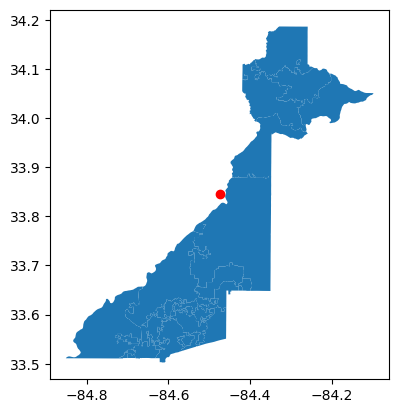

In [27]:
ax = cities.plot()
plt.plot(x, y, 'o', zorder=10, clip_on=False, color="red")

[[0.06943716 0.0964434  0.10885205 0.11688265 0.11688265 0.11688265
  0.11688265 0.09740221]
 [0.05458659 0.0685445  0.12434309 0.14210268 0.14610331 0.14610331
  0.14610331 0.11688265]
 [0.04570117 0.03409527 0.07832109 0.12899125 0.14269086 0.14610331
  0.14610331 0.11688265]
 [0.07057008 0.03435076 0.02989089 0.08246111 0.12443976 0.13355346
  0.14042074 0.113136  ]
 [0.10054593 0.09606439 0.03913195 0.04404206 0.07128105 0.10326876
  0.09713519 0.10007562]
 [0.114256   0.13070419 0.10844104 0.10141337 0.09965872 0.05864479
  0.05673678 0.06766703]
 [0.11671016 0.14393351 0.14186226 0.13989625 0.13068553 0.09591437
  0.07566175 0.093423  ]
 [0.09740221 0.11688265 0.11688265 0.11688265 0.11341989 0.10547571
  0.09789822 0.08939176]]
[[0.06943716 0.0964434  0.10885205 0.11688265 0.11688265 0.11688265
  0.11688265 0.09740221]
 [0.05458659 0.0685445  0.12434309 0.14210268 0.14610331 0.14610331
  0.14610331 0.11688265]
 [0.04570117 0.03409527 0.07832109 0.12899125 0.14269086 0.14610331
 

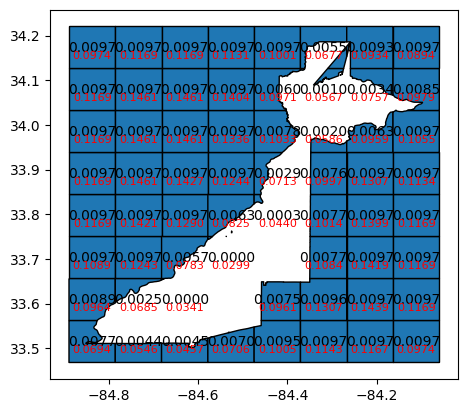

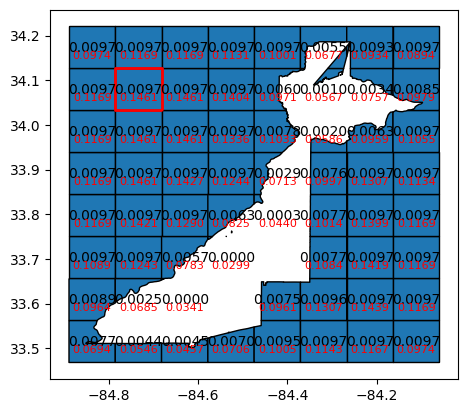

In [63]:
# create a grid overlay
import numpy as np
from scipy import ndimage
from shapely.geometry import shape, box

empty_area = diff
n = 8
x_range = np.linspace(xmin, xmax, n + 1)
y_range = np.linspace(ymin, ymax, n + 1)

# find intersection area for each grid cell and the empty area plot
intersection_areas = []
area_totals = []
for i in range(n):
    for j in range(n):
        grid_box = box(x_range[i], y_range[j], x_range[i + 1], y_range[j + 1])
        intersection_area = empty_area.intersection(grid_box)
        if intersection_area.geom_type.iloc[0] == 'GeometryCollection':
            for geom in intersection_area.geoms.iloc[0]:
                if not geom.is_empty:
                    intersection_areas.append(geom)
                    area_totals.append((geom.area, grid_box.centroid.x, grid_box.centroid.y, i, j))
        elif not intersection_area.is_empty.iloc[0]:
            intersection_areas.append(intersection_area.iloc[0])
            area_totals.append((intersection_area.area.iloc[0], grid_box.centroid.x, grid_box.centroid.y, i, j))

ax = gpd.GeoDataFrame(geometry=intersection_areas).plot(edgecolor="black")
for area, x, y, _, _ in area_totals:
    ax.text(x, y, f"{area:.4f}", ha="center", va="center")

# Initialize a 2D array with zeros
areas_2d = np.zeros((n, n))

# Fill in the area values based on grid cell indices
for area, _, _, i, j in area_totals:
    areas_2d[i, j] = area

# Define the convolution filter
convolution_filter = np.array([[1, 1, 1], [1, 7, 1], [1, 1, 1]])

# Perform the convolution
filtered_areas = ndimage.convolve(areas_2d, convolution_filter, mode='constant', cval=0.0)

# Annotate the filtered areas on the plot
for area, x, y, i, j in area_totals:
    filtered_area = filtered_areas[i, j]
    ax.text(x, y - 0.01 * (ymax - ymin), f"{filtered_area:.4f}", ha="center", va="top", fontsize=8, color="red")

# Print the filtered areas
print(filtered_areas)
# create a grid overlay
import numpy as np
from scipy import ndimage
from shapely.geometry import shape, box

empty_area = diff
n = 8
x_range = np.linspace(xmin, xmax, n + 1)
y_range = np.linspace(ymin, ymax, n + 1)

# find intersection area for each grid cell and the empty area plot
intersection_areas = []
area_totals = []
for i in range(n):
    for j in range(n):
        grid_box = box(x_range[i], y_range[j], x_range[i + 1], y_range[j + 1])
        intersection_area = empty_area.intersection(grid_box)
        if intersection_area.geom_type.iloc[0] == 'GeometryCollection':
            for geom in intersection_area.geoms.iloc[0]:
                if not geom.is_empty:
                    intersection_areas.append(geom)
                    area_totals.append((geom.area, grid_box.centroid.x, grid_box.centroid.y, i, j))
        elif not intersection_area.is_empty.iloc[0]:
            intersection_areas.append(intersection_area.iloc[0])
            area_totals.append((intersection_area.area.iloc[0], grid_box.centroid.x, grid_box.centroid.y, i, j))

ax = gpd.GeoDataFrame(geometry=intersection_areas).plot(edgecolor="black")
for area, x, y, _, _ in area_totals:
    ax.text(x, y, f"{area:.4f}", ha="center", va="center")

# Initialize a 2D array with zeros
areas_2d = np.zeros((n, n))

# Fill in the area values based on grid cell indices
for area, _, _, i, j in area_totals:
    areas_2d[i, j] = area

# Define the convolution filter
convolution_filter = np.array([[1, 1, 1], [1, 7, 1], [1, 1, 1]])

# Perform the convolution
filtered_areas = ndimage.convolve(areas_2d, convolution_filter, mode='constant', cval=0.0)

# Annotate the filtered areas on the plot
for area, x, y, i, j in area_totals:
    filtered_area = filtered_areas[i, j]
    ax.text(x, y - 0.01 * (ymax - ymin), f"{filtered_area:.4f}", ha="center", va="top", fontsize=8, color="red")

# Get the indices of the max filtered area
max_indices = np.unravel_index(np.argmax(filtered_areas), filtered_areas.shape)
max_i, max_j = max_indices

# Get the max box coordinates
max_box = box(x_range[max_i], y_range[max_j], x_range[max_i + 1], y_range[max_j + 1])

# Plot the max box
gpd.GeoSeries([max_box]).plot(ax=ax, edgecolor="red", facecolor="none", linewidth=2)

# Print the filtered areas
print(filtered_areas)
# TODO return center of max box
# return max_box.centroid.x, max_box.centroid.y
# Use the polygon in your code
# ...
# Use the polygon in your code
# ...

In [11]:
# so we know that all additional itemds are by default placed outside the main axis
# if we add new items within the axis, do they count as part of space plotted

In [12]:
q

NameError: name 'q' is not defined

In [ ]:
from components import *

In [ ]:
cities.columns

Index(['OBJECTID', 'Name', 'TaxCode', 'AreaAc', 'AreaSqMi', 'GEOID10',
       'FeatureID', 'MuniCode', 'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

[[7.65246169e-03 8.90676148e-03 9.74022094e-03 9.74022094e-03
  9.74022094e-03 9.74022094e-03 9.74022094e-03 9.74022094e-03]
 [4.42009470e-03 2.54307623e-03 9.74022094e-03 9.74022094e-03
  9.74022094e-03 9.74022094e-03 9.74022094e-03 9.74022094e-03]
 [4.53239230e-03 1.12324452e-05 5.73958605e-03 9.74022094e-03
  9.74022094e-03 9.74022094e-03 9.74022094e-03 9.74022094e-03]
 [7.00002514e-03 0.00000000e+00 4.12517214e-05 6.32776258e-03
  9.74022094e-03 9.74022094e-03 9.74022094e-03 9.74022094e-03]
 [9.53527864e-03 7.49099611e-03 0.00000000e+00 2.92326743e-04
  2.87294037e-03 7.80429725e-03 5.99357136e-03 9.74022094e-03]
 [9.74022094e-03 9.56773275e-03 7.74290639e-03 7.66897364e-03
  7.60171731e-03 1.99495094e-03 3.14682345e-05 4.50030352e-03]
 [9.74022094e-03 9.74022094e-03 9.74022094e-03 9.74022094e-03
  9.74022094e-03 6.33276969e-03 3.37977176e-03 9.24569335e-03]
 [9.74022094e-03 9.74022094e-03 9.74022094e-03 9.74022094e-03
  9.74022094e-03 9.68491002e-03 8.48835235e-03 9.74022094e-03]]

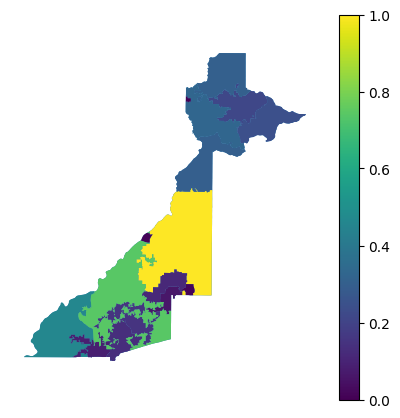

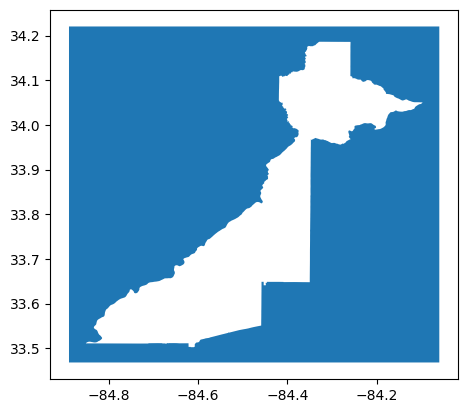

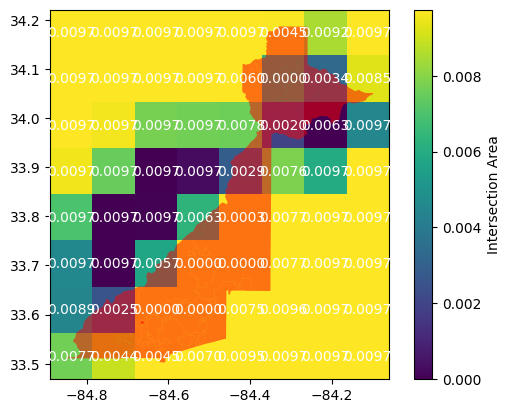

NameError: name 'largest_box' is not defined

In [ ]:
canvas = cities.geocanvas(figsize=(5, 5)) \
    + Choropleth(column="AreaSqMi", cmap="viridis") \
    + Colorbar()
canvas.plot()

In [ ]:
    p = gpd.GeoSeries(empty_area)
    p.plot(ax=ax, color="red")